In [62]:
from sklearn.neural_network import MLPClassifier

In [63]:
X = [[0., 0.], [1., 1.]]

In [64]:
y = [0, 1]

In [65]:
clf = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5, 2), random_state=1)

In [66]:
clf.fit(X, y)

MLPClassifier(alpha=1e-05, hidden_layer_sizes=(5, 2), random_state=1,
              solver='lbfgs')

In [67]:
clf.predict([[2., 2.], [-1., -2.]])

array([1, 0])

In [68]:
[coef.shape for coef in clf.coefs_]

[(2, 5), (5, 2), (2, 1)]

In [69]:
clf.predict_proba([[2., 2.], [1., 2.]])

array([[1.96718015e-04, 9.99803282e-01],
       [1.96718015e-04, 9.99803282e-01]])

### Neural Network using Diabetes Dataset

In [137]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn.neural_network import MLPClassifier
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.metrics import r2_score
from sklearn.metrics import classification_report,confusion_matrix

In [138]:
df = pd.read_csv('diabetes.csv')

In [139]:
print(df.shape)

(768, 9)


In [140]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [141]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [142]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [143]:
target_column = ['Outcome']
predictors = list(set(list(df.columns))-set(target_column))
df[predictors] = df[predictors]/df[predictors].max()
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,0.226180,0.198210,0.000000,0.058824,0.176471,0.352941,1.0
Glucose,768.0,0.607510,0.160666,0.000000,0.497487,0.587940,0.704774,1.0
BloodPressure,768.0,0.566438,0.158654,0.000000,0.508197,0.590164,0.655738,1.0
SkinThickness,768.0,0.207439,0.161134,0.000000,0.000000,0.232323,0.323232,1.0
Insulin,768.0,0.094326,0.136222,0.000000,0.000000,0.036052,0.150414,1.0
BMI,768.0,0.476790,0.117499,0.000000,0.406855,0.476900,0.545455,1.0
DiabetesPedigreeFunction,768.0,0.194990,0.136913,0.032231,0.100723,0.153926,0.258781,1.0
Age,768.0,0.410381,0.145188,0.259259,0.296296,0.358025,0.506173,1.0
Outcome,768.0,0.348958,0.476951,0.000000,0.000000,0.000000,1.000000,1.0


In [144]:
X = df[predictors].values

In [145]:
X

array([[0.74371859, 0.59016393, 0.35353535, ..., 0.50074516, 0.25909091,
        0.61728395],
       [0.42713568, 0.54098361, 0.29292929, ..., 0.39642325, 0.14504132,
        0.38271605],
       [0.91959799, 0.52459016, 0.        , ..., 0.34724292, 0.27768595,
        0.39506173],
       ...,
       [0.6080402 , 0.59016393, 0.23232323, ..., 0.390462  , 0.10123967,
        0.37037037],
       [0.63316583, 0.49180328, 0.        , ..., 0.4485842 , 0.14421488,
        0.58024691],
       [0.46733668, 0.57377049, 0.31313131, ..., 0.45305514, 0.13016529,
        0.28395062]])

In [146]:
df["Outcome"]

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [147]:
y = df[target_column].values

In [148]:
y

array([[1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
    

In [149]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=40)
print(X_train.shape); print(X_test.shape)

(614, 8)
(154, 8)


In [150]:
mlp = MLPClassifier(hidden_layer_sizes=(8,8,8), activation='relu', solver='adam',max_iter=500)

In [151]:
mlp.fit(X_train,y_train)

C:\Users\india\Anaconda3\envs\AIML\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


MLPClassifier(hidden_layer_sizes=(8, 8, 8), max_iter=500)

In [152]:
predict_train = mlp.predict(X_train)

In [153]:
print("Training set score: %f" % mlp.score(X_train, y_train))

Training set score: 0.780130


In [154]:
predict_test = mlp.predict(X_test)

In [155]:
print("Test set score: %f" % mlp.score(X_test, y_test))

Test set score: 0.759740


In [156]:
print(confusion_matrix(y_train,predict_train))

[[364  41]
 [ 94 115]]


In [157]:
print(classification_report(y_train,predict_train))

              precision    recall  f1-score   support

           0       0.79      0.90      0.84       405
           1       0.74      0.55      0.63       209

    accuracy                           0.78       614
   macro avg       0.77      0.72      0.74       614
weighted avg       0.78      0.78      0.77       614



In [158]:
print(confusion_matrix(y_test,predict_test))

[[86  9]
 [28 31]]


In [159]:
print(classification_report(y_test,predict_test))

              precision    recall  f1-score   support

           0       0.75      0.91      0.82        95
           1       0.78      0.53      0.63        59

    accuracy                           0.76       154
   macro avg       0.76      0.72      0.72       154
weighted avg       0.76      0.76      0.75       154



In [160]:
print("Training set score: %f" % mlp.score(X_train, y_train))

Training set score: 0.780130


### Visualization of MLP weights on MNIST

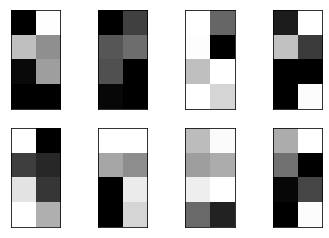

In [168]:
fig, axes = plt.subplots(2, 4)
# use global min / max to ensure all weights are shown on the same scale
vmin, vmax = mlp.coefs_[0].min(), mlp.coefs_[0].max()
for coef, ax in zip(mlp.coefs_[0].T, axes.ravel()):
    ax.matshow(coef.reshape(4, 2), cmap=plt.cm.gray, vmin=.5 * vmin,vmax=.5 * vmax)
    ax.set_xticks(())
    ax.set_yticks(())

plt.show()

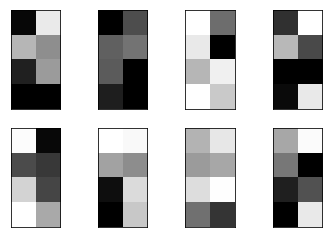

In [169]:
fig, axes = plt.subplots(2, 4)
# use global min / max to ensure all weights are shown on the same scale
vmin, vmax = mlp.coefs_[1].min(), mlp.coefs_[1].max()
for coef, ax in zip(mlp.coefs_[0].T, axes.ravel()):
    ax.matshow(coef.reshape(4, 2), cmap=plt.cm.gray, vmin=.5 * vmin,vmax=.5 * vmax)
    ax.set_xticks(())
    ax.set_yticks(())

plt.show()

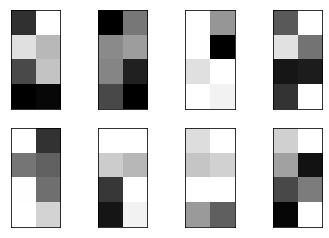

In [170]:
fig, axes = plt.subplots(2, 4)
# use global min / max to ensure all weights are shown on the same scale
vmin, vmax = mlp.coefs_[3].min(), mlp.coefs_[3].max()
for coef, ax in zip(mlp.coefs_[0].T, axes.ravel()):
    ax.matshow(coef.reshape(4, 2), cmap=plt.cm.gray, vmin=.5 * vmin,vmax=.5 * vmax)
    ax.set_xticks(())
    ax.set_yticks(())

plt.show()

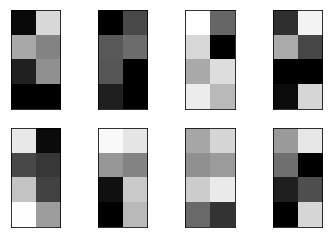

In [171]:
fig, axes = plt.subplots(2, 4)
# use global min / max to ensure all weights are shown on the same scale
vmin, vmax = mlp.coefs_[2].min(), mlp.coefs_[2].max()
for coef, ax in zip(mlp.coefs_[0].T, axes.ravel()):
    ax.matshow(coef.reshape(4, 2), cmap=plt.cm.gray, vmin=.5 * vmin,vmax=.5 * vmax)
    ax.set_xticks(())
    ax.set_yticks(())

plt.show()